<b> In this notebook, i began to explore the Events table in GDELT. I also was beginning to use some python libraries to try to do some basic data aggregation. At the time of creating this notebook, i was not very good in using the numpy and pandas python libraries. I also began to explore how to use SQL within python because i was already pretty fluent in SQL. Some of the notable things about this notebook was me attempting to graph my results at the end of the notebook and showing a time series graph of the number of mentions where China was actor 1 and the location was Guam for each month since 2015.</b>

The CSV in this markdown was pulled from BigQuery on 9/27/2020 with the following query:

SELECT 
  GLOBALEVENTID, SQLDATE, MonthYear, Actor1Name, Actor1CountryCode, Actor2Name, Actor2CountryCode, EventCode, GoldsteinScale, NumMentions, NumSources, NumArticles, AvgTone, Actor1Geo_FullName, Actor1Geo_CountryCode, Actor2Geo_FullName, Actor2Geo_CountryCode ,ActionGeo_FullName, ActionGeo_ADM1Code, SOURCEURL
FROM 
  `gdelt-bq.gdeltv2.events` 
WHERE 
  ActionGeo_ADM1Code = 'FM'
  OR ActionGeo_ADM1Code = 'FJ'
  OR ActionGeo_ADM1Code = 'KR'
  OR ActionGeo_ADM1Code = 'RM'
  OR ActionGeo_ADM1Code = 'NR'
  OR ActionGeo_ADM1Code = 'PS'
  OR ActionGeo_ADM1Code = 'PP'
  OR ActionGeo_ADM1Code = 'WS'
  OR ActionGeo_ADM1Code = 'BP'
  OR ActionGeo_ADM1Code = 'TN'
  OR ActionGeo_ADM1Code = 'TV'
  OR ActionGeo_ADM1Code = 'NH'
  OR ActionGeo_ADM1Code = 'CW'
  OR ActionGeo_ADM1Code = 'NE'
  OR ActionGeo_ADM1Code = 'AQ'
  OR ActionGeo_FullName = 'Ashmore Reef, Queensland, Australia'
  OR ActionGeo_ADM1Code = 'FQ'
  OR ActionGeo_FullName = 'Coral Sea, Oceans (general), Oceans'
  OR ActionGeo_FullName like 'Easter Island, V%'
  OR ActionGeo_FullName = 'Galapagos, Imbabura, Ecuador'
  OR ActionGeo_ADM1Code = 'FP'
  OR ActionGeo_ADM1Code = 'GQ'
  OR ActionGeo_ADM1Code = 'HQ'
  OR ActionGeo_ADM1Code = 'DQ'
  OR ActionGeo_ADM1Code = 'JQ'
  OR ActionGeo_ADM1Code = 'KQ'
  OR ActionGeo_FullName = 'Midway Island, Western Australia, Australia'
  OR ActionGeo_ADM1Code = 'NC'
  OR ActionGeo_ADM1Code = 'NF'
  OR ActionGeo_ADM1Code = 'CQ'
  OR ActionGeo_FullName = 'Ogasawaramura, Tokyo, Japan'
  OR ActionGeo_ADM1Code = 'LQ'
  OR ActionGeo_ADM1Code = 'ID36' -- Papua, Indonesia
  OR ActionGeo_ADM1Code = 'PC'
  OR ActionGeo_ADM1Code = 'TL'
  OR ActionGeo_ADM1Code = 'WQ'
  OR ActionGeo_ADM1Code = 'WF'
  OR ActionGeo_ADM1Code = 'ID30' -- Barat, Indonesia
  OR ActionGeo_FullName = 'Bora Bora, French Polynesia (general), French Polynesia'
  OR ActionGeo_FullName = 'Bonin Islands, Tokyo, Japan'


In [1]:
import numpy as np
import pandas as pd

pd.set_option('display.max_columns', 500)

df = pd.read_csv('C:/Users/dlili/OneDrive/Documents/CSUMB/UROC Fall 2020/All Oceania Events.csv')

C:\Users\dlili\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (3,4,13,14) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Lets take a view of a the first few lines

In [2]:
df.head()

,GLOBALEVENTID,SQLDATE,MonthYear,Actor1Name,Actor1CountryCode,Actor2Name,Actor2CountryCode,EventCode,GoldsteinScale,NumMentions,NumSources,NumArticles,AvgTone,Actor1Geo_FullName,Actor1Geo_CountryCode,Actor2Geo_FullName,Actor2Geo_CountryCode,ActionGeo_FullName,ActionGeo_ADM1Code,SOURCEURL
0,948974965,20200927,202009,PHILIPPINE,PHL,RAIDER,NaN,173,-5.0,8,1,8,-3.900325,Philippines,RP,Samoa,WS,Samoa,WS,https://nationalinterest.org/blog/reboot/these...
1,948975139,20200927,202009,PUERTO RICO,USA,RAIDER,NaN,173,-5.0,2,1,2,-3.900325,Philippines,RP,Samoa,WS,Samoa,WS,https://nationalinterest.org/blog/reboot/these...
2,948975140,20200927,202009,PUERTO RICO,USA,RAIDER,NaN,173,-5.0,8,1,8,-3.900325,Puerto Rico,RQ,Samoa,WS,Samoa,WS,https://nationalinterest.org/blog/reboot/these...
3,948903418,20200927,202009,PALAU,PLW,TAIWAN,TWN,51,3.4,2,1,2,2.690583,Honduras,HO,Palau,PS,Palau,PS,https://taipeitimes.com/News/taiwan/archives/2...
4,948903425,20200927,202009,PARAGUAY,PRY,TAIWAN,TWN,51,3.4,2,1,2,2.690583,Honduras,HO,Palau,PS,Palau,PS,https://taipeitimes.com/News/taiwan/archives/2...


Show the data types of the dataframe

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1351482 entries, 0 to 1351481
Data columns (total 20 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   GLOBALEVENTID          1351482 non-null  int64  
 1   SQLDATE                1351482 non-null  int64  
 2   MonthYear              1351482 non-null  int64  
 3   Actor1Name             1196865 non-null  object 
 4   Actor1CountryCode      672281 non-null   object 
 5   Actor2Name             880521 non-null   object 
 6   Actor2CountryCode      524619 non-null   object 
 7   EventCode              1351482 non-null  int64  
 8   GoldsteinScale         1351481 non-null  float64
 9   NumMentions            1351482 non-null  int64  
 10  NumSources             1351482 non-null  int64  
 11  NumArticles            1351482 non-null  int64  
 12  AvgTone                1351482 non-null  float64
 13  Actor1Geo_FullName     1196383 non-null  object 
 14  Actor1Geo_CountryC

In [4]:
# Count of all the ActionGeo_FullName's in the data set
df['ActionGeo_FullName'].count()

1351055

In [5]:
# Counts how many occurences each location appears in the data set
df['ActionGeo_FullName'].value_counts()

Guam                                   174439
Fiji                                   157613
Bandung, Jawa Barat, Indonesia         130958
Samoa                                   73323
Papua New Guinea                        59285
                                        ...  
Cipadang, Jawa Barat, Indonesia             1
Situ Ciburuy, Jawa Barat, Indonesia         1
Konten, Jawa Barat, Indonesia               1
Waluya, Jawa Barat, Indonesia               1
Kiarasari, Jawa Barat, Indonesia            1
Name: ActionGeo_FullName, Length: 1626, dtype: int64

Lets look at the all the location of the event and the two actors of both events

In [6]:
# Count the number top occurences of an ActionGeo_FullName, Actor1Geo_FullName, and Actor2Geo_FullName combination
df[['ActionGeo_FullName','Actor1Geo_FullName','Actor2Geo_FullName']].value_counts()

ActionGeo_FullName              Actor1Geo_FullName                   Actor2Geo_FullName                     
Guam                            Guam                                 Guam                                       71643
Fiji                            Fiji                                 Fiji                                       62871
Bandung, Jawa Barat, Indonesia  Bandung, Jawa Barat, Indonesia       Bandung, Jawa Barat, Indonesia             46205
Samoa                           Samoa                                Samoa                                      27518
Nauru                           Nauru                                Nauru                                      21571
                                                                                                                ...  
Marshall Islands                Marshall Islands                     Maryland, United States                        1
                                                                 

Lets filter by not having events where the actors of the events are the same as the location 

In [7]:
# Creating a temporary data set with only ActionGeo_FullName, Actor1Geo_FullName, and Actor2Geo_FullName's
temp_df = df[['ActionGeo_FullName','Actor1Geo_FullName','Actor2Geo_FullName']]
# Filtered the data set by not allowing the ActionGeo_FullName be the same as the Actor1Geo_FullName or Actor2Geo_FullName
temp_df = temp_df[(df['ActionGeo_FullName'] != df['Actor1Geo_FullName']) & (df['ActionGeo_FullName'] != df['Actor2Geo_FullName'])]

In [8]:
# This could have been done easier using temp_df['ActionGeo_FullName'].value_counts()
# This gives the number of occurences an action location appeared in the data set
temp_df.groupby('ActionGeo_FullName').size().sort_values(ascending=False)

ActionGeo_FullName
Fiji                                   12665
Guam                                   11296
Vanuatu                                 8589
Bandung, Jawa Barat, Indonesia          8402
Papua New Guinea                        7545
                                       ...  
Cibungbulang, Jawa Barat, Indonesia        1
Rawa Sentul, Jawa Barat, Indonesia         1
Cibulao, Jawa Barat, Indonesia             1
Cibulan, Jawa Barat, Indonesia             1
Malati, Jawa Barat, Indonesia              1
Length: 959, dtype: int64

In [9]:
# This is the top occurences of ActionGeo_FullName, Actor1Geo_FullName combinations within the filtered data set
temp_df.groupby(['ActionGeo_FullName','Actor1Geo_FullName'])['Actor1Geo_FullName'].count().head(50).sort_values(ascending=False)

ActionGeo_FullName              Actor1Geo_FullName                                      
Agung, Jawa Barat, Indonesia    Bali, Jawa Timur, Indonesia                                 25
                                Australia                                                   10
                                Jakarta, Jakarta Raya, Indonesia                             6
                                Mount Agung, Bali, Indonesia                                 6
Agats, Papua, Indonesia         Jakarta, Jakarta Raya, Indonesia                             6
Agung, Jawa Barat, Indonesia    Bali, Perifereia Kritis, Greece                              4
                                Heathrow, Hillingdon, United Kingdom                         4
                                Pascani, Romania (general), Romania                          3
                                Barbados                                                     3
Agats, Papua, Indonesia         Guinea                  

In [10]:
# This is all the top combinations of Actor1Geo_FullName and the number of occurences that an ActionGeo_FullName has with it. I'm not sure why i did this but it makes no logical sense. 
temp_df.groupby('Actor1Geo_FullName')['ActionGeo_FullName'].count().sort_values(ascending=False)

Actor1Geo_FullName
Jakarta, Jakarta Raya, Indonesia              8066
Australia                                     4552
Fiji                                          3020
New Zealand                                   2844
Tonga                                         1922
                                              ... 
Misool Island, Irian Jaya Barat, Indonesia       1
Majlis, Khowst, Afghanistan                      1
Warungkiara, Jawa Barat, Indonesia               0
Port Lincoln, South Australia, Australia         0
Pluit, Jakarta Raya, Indonesia                   0
Name: ActionGeo_FullName, Length: 4948, dtype: int64

# Try to use SQL because i don't know pandas well enough to do what i want to do with it :(

In [24]:
# This is my first attempt at using SQL within python. 

import sqlalchemy
from sqlalchemy import create_engine
engine = create_engine('sqlite://', echo=False)

temp_df.to_sql('temp', con=engine)
engine.execute("SELECT * FROM temp LIMIT 50").fetchall()

[(5, 'Fiji', 'India', 'India'),
 (8, 'Bora Bora, French Polynesia (general), French Polynesia', 'Japan', 'Papeete, French Polynesia (general), French Polynesia'),
 (9, 'Bora Bora, French Polynesia (general), French Polynesia', 'Japan', 'Papeete, French Polynesia (general), French Polynesia'),
 (10, 'Marshall Islands', 'Paraguay', 'Taiwan'),
 (13, 'Bogor, Jawa Barat, Indonesia', 'Russia', None),
 (14, 'Ciwidey, Jawa Barat, Indonesia', 'Singapore', None),
 (15, 'Palau', 'Taiwan', 'Honduras'),
 (16, 'Palau', 'Taiwan', 'Paraguay'),
 (17, 'Palau', 'Taiwan', 'Paraguay'),
 (20, 'Palau', 'Taiwan', 'Marshall Islands'),
 (21, 'Palau', 'Taiwan', 'Marshall Islands'),
 (24, 'Tuvalu', 'Taiwan', 'Taiwan'),
 (27, 'Marshall Islands', 'Brussels, Bruxelles-Capitale, Belgium', None),
 (29, 'Easter Island, Valparaí, Chile', 'Santiago, Regióetropolitana, Chile', None),
 (30, 'Guam', 'New Delhi, Delhi, India', 'Moscow, Moskva, Russia'),
 (35, 'Marshall Islands', 'Republic Of China, Taiwan (general), Taiwan',

Check the SQL script

In [25]:
# Trying out more SQL to see what the results give
engine.execute("SELECT distinct Actor1Geo_FullName FROM temp LIMIT 50").fetchall()

[('India',),
 ('Japan',),
 ('Paraguay',),
 ('Russia',),
 ('Singapore',),
 ('Taiwan',),
 ('Brussels, Bruxelles-Capitale, Belgium',),
 ('Santiago, Regióetropolitana, Chile',),
 ('New Delhi, Delhi, India',),
 ('Republic Of China, Taiwan (general), Taiwan',),
 ('Marham, Norfolk, United Kingdom',),
 ('Niue',),
 ('Tokelau',),
 ('Alexandria, Al Iskandariyah, Egypt',),
 ('Province Of Newfoundland, Newfoundland, Canada',),
 ('Paris, France (general), France',),
 ('Cuba',),
 ('Israel',),
 ('Bonn, Nordrhein-Westfalen, Germany',),
 ("Seoul, Soul-t'ukpyolsi, South Korea",),
 ('Catalunya, Spain (general), Spain',),
 ('Afghanistan',),
 ('Hong Kong',),
 ('Johnston Atoll',),
 ('North Korea',),
 ('South Korea',),
 ('Netherlands',),
 ('Jaipur, Rajasthan, India',),
 ("Pyongyang, P'yongyang-si, North Korea",),
 ('Maupiti, French Polynesia (general), French Polynesia',),
 ('Denisova, Permskiy Kray, Russia',),
 ('London, London, City of, United Kingdom',),
 ('Mauritius',),
 ('Sao Paulo, SãPaulo, Brazil',),
 

In [26]:
# Show all the ActionGeo_FullNames, the Actor1 and the amout of times Actor 1 is mentioned. Also filter by greater than 1 event

query = """
SELECT ActionGeo_FullName, Actor1Geo_FullName, count(Actor1Geo_FullName) 
FROM temp 
WHERE ActionGeo_FullName != "None"
GROUP BY ActionGeo_FullName, Actor1Geo_FullName
HAVING count(Actor1Geo_FullName) > 1
LIMIT 50
"""

temp_result = engine.execute(query).fetchall()

_Next i am going to try to convert all that gunk into a data frame_

In [27]:
# Convert result into numpy array
temp1 = np.array(temp_result)
# Convert np array into dataframe
df2 = pd.DataFrame(data=temp1, columns=['ActionGeo_FullName','Actor1Geo_FullName','count(Actor1Geo_FullName)'])
# Make the count a integer and not a string, also change the other objects to strings
df2 = df2.convert_dtypes()
df2['count(Actor1Geo_FullName)'] = df2['count(Actor1Geo_FullName)'].astype(int)

In [28]:
# Check the datatype (data conversion) to make sure it worked
df2.dtypes

ActionGeo_FullName           string
Actor1Geo_FullName           string
count(Actor1Geo_FullName)     int32
dtype: object

Show the Action location with Actor1 and the number to times they mention them

In [29]:
df2.sort_values(by='count(Actor1Geo_FullName)',ascending=False).head(50)

,ActionGeo_FullName,Actor1Geo_FullName,count(Actor1Geo_FullName)
42,American Samoa,"Colorado, United States",34
32,American Samoa,"Arkansas, United States",30
38,American Samoa,"California, United States",26
6,"Agung, Jawa Barat, Indonesia","Bali, Jawa Timur, Indonesia",25
40,American Samoa,China,24
27,American Samoa,"Alabama, United States",21
28,American Samoa,"Alaska, United States",20
31,American Samoa,"Arizona, United States",17
49,American Samoa,Fiji,13
46,American Samoa,"District of Columbia, United States",13


In [30]:
# This query shows all the countries (except the united states) who talked about about guam. 

query = """
SELECT ActionGeo_FullName, Actor1Geo_FullName, count(Actor1Geo_FullName) 
FROM temp 
WHERE ActionGeo_FullName = "Guam" and Actor1Geo_FullName not like "%United States"
GROUP BY ActionGeo_FullName, Actor1Geo_FullName
HAVING count(Actor1Geo_FullName) > 0
ORDER BY count(Actor1Geo_FullName) DESC
LIMIT 50
"""

temp_result = engine.execute(query).fetchall()
# Convert result into numpy array
temp1 = np.array(temp_result)
# Convert np array into dataframe
df2 = pd.DataFrame(data=temp1, columns=['ActionGeo_FullName','Actor1Geo_FullName','count(Actor1Geo_FullName)'])
# Make the count a integer and not a string, also change the other objects to strings
df2 = df2.convert_dtypes()
df2['count(Actor1Geo_FullName)'] = df2['count(Actor1Geo_FullName)'].astype(int)
df2.head(50)

,ActionGeo_FullName,Actor1Geo_FullName,count(Actor1Geo_FullName)
0,Guam,"Pyongyang, P'yongyang-si, North Korea",820
1,Guam,Japan,603
2,Guam,North Korea,526
3,Guam,South Korea,314
4,Guam,"Seoul, Soul-t'ukpyolsi, South Korea",213
5,Guam,China,192
6,Guam,Philippines,190
7,Guam,"Tokyo, Tokyo, Japan",150
8,Guam,"Beijing, Beijing, China",126
9,Guam,"Philippine, Benguet, Philippines",122


In [40]:
# This query shows how many times china has talked about about guam. 

query = """
SELECT t.ActionGeo_FullName, sum(t.c) from
(SELECT ActionGeo_FullName, Actor1Geo_FullName, count(Actor1Geo_FullName) as c
FROM temp 
WHERE ActionGeo_FullName = "Guam" and Actor1Geo_FullName like "%China"
GROUP BY ActionGeo_FullName, Actor1Geo_FullName) as t
LIMIT 50
"""

temp_result = engine.execute(query).fetchall()
# Convert result into numpy array
temp1 = np.array(temp_result)
# Convert np array into dataframe
df2 = pd.DataFrame(data=temp1, columns=['ActionGeo_FullName','chinaMentions',])
# Make the count a integer and not a string, also change the other objects to strings
df2 = df2.convert_dtypes()
df2['chinaMentions'] = df2['chinaMentions'].astype(int)
df2.head(50)

,ActionGeo_FullName,chinaMentions
0,Guam,383


# Time to use the whole dataset and not the sub dataset

_Disclosure, the next part is super messy_

In [42]:
df.to_sql('df3', con=engine)
engine.execute("SELECT * FROM df").fetchall()

[(0, 948974965, 20200927, 202009, 'PHILIPPINE', 'PHL', 'RAIDER', None, 173, -5.0, 8, 1, 8, -3.90032502708559, 'Philippines', 'RP', 'Samoa', 'WS', 'Samoa', 'WS', 'https://nationalinterest.org/blog/reboot/these-deadly-us-battlecruisers-had-no-enemy-fight-heres-why-169597'),
 (1, 948975139, 20200927, 202009, 'PUERTO RICO', 'USA', 'RAIDER', None, 173, -5.0, 2, 1, 2, -3.90032502708559, 'Philippines', 'RP', 'Samoa', 'WS', 'Samoa', 'WS', 'https://nationalinterest.org/blog/reboot/these-deadly-us-battlecruisers-had-no-enemy-fight-heres-why-169597'),
 (2, 948975140, 20200927, 202009, 'PUERTO RICO', 'USA', 'RAIDER', None, 173, -5.0, 8, 1, 8, -3.90032502708559, 'Puerto Rico', 'RQ', 'Samoa', 'WS', 'Samoa', 'WS', 'https://nationalinterest.org/blog/reboot/these-deadly-us-battlecruisers-had-no-enemy-fight-heres-why-169597'),
 (3, 948903418, 20200927, 202009, 'PALAU', 'PLW', 'TAIWAN', 'TWN', 51, 3.4, 2, 1, 2, 2.6905829596412496, 'Honduras', 'HO', 'Palau', 'PS', 'Palau', 'PS', 'https://taipeitimes.com/N

In [43]:
# This query shows all the events of with MonthYear, ActionGeo_FullName, Actor1Geo_FullName, Actor2Geo_FullName

query = """
SELECT MonthYear, ActionGeo_FullName, Actor1Geo_FullName, Actor2Geo_FullName
FROM df3
LIMIT 50
"""

temp_result = engine.execute(query).fetchall()

temp1 = np.array(temp_result)
# Convert np array into dataframe
df2 = pd.DataFrame(data=temp1, columns=['MonthYear', 'ActionGeo_FullName', 'Actor1Geo_FullName', 'Actor2Geo_FullName'])
# Make the count a integer and not a string, also change the other objects to strings
df2 = df2.convert_dtypes()
df2.head(50)

,MonthYear,ActionGeo_FullName,Actor1Geo_FullName,Actor2Geo_FullName
0,202009,Samoa,Philippines,Samoa
1,202009,Samoa,Philippines,Samoa
2,202009,Samoa,Puerto Rico,Samoa
3,202009,Palau,Honduras,Palau
4,202009,Palau,Honduras,Palau
5,202009,Fiji,India,India
6,202009,"Bora Bora, French Polynesia (general), French ...",Japan,"Bora Bora, French Polynesia (general), French ..."
7,202009,"Bora Bora, French Polynesia (general), French ...",Japan,"Bora Bora, French Polynesia (general), French ..."
8,202009,"Bora Bora, French Polynesia (general), French ...",Japan,"Papeete, French Polynesia (general), French Po..."
9,202009,"Bora Bora, French Polynesia (general), French ...",Japan,"Papeete, French Polynesia (general), French Po..."


In [44]:
# This query shows all the events of with MonthYear, ActionGeo_FullName = Guam, Actor1Geo_FullName = China, Count
# The next thing is to apply a subquery to get a clearner result

query = """
SELECT MonthYear, ActionGeo_FullName, Actor1Geo_FullName, count(*) as count
FROM df3
WHERE ActionGeo_FullName = "Guam" and Actor1Geo_FullName like "%China"
GROUP BY MonthYear, ActionGeo_FullName, Actor1Geo_FullName
ORDER BY count
LIMIT 50
"""

temp_result = engine.execute(query).fetchall()

temp1 = np.array(temp_result)
# Convert np array into dataframe
df2 = pd.DataFrame(data=temp1, columns=['MonthYear', 'ActionGeo_FullName', 'Actor1Geo_FullName', 'count'])
# Make the count a integer and not a string, also change the other objects to strings
df2 = df2.convert_dtypes()
df2['count'] = df2['count'].astype(int)
df2.head(50)

,MonthYear,ActionGeo_FullName,Actor1Geo_FullName,count
0,192001,Guam,"Beijing, Beijing, China",1
1,201501,Guam,China,1
2,201504,Guam,"Beijing, Beijing, China",1
3,201504,Guam,China,1
4,201505,Guam,"Beijing, Beijing, China",1
5,201506,Guam,"Beijing, Beijing, China",1
6,201508,Guam,"Beijing, Beijing, China",1
7,201509,Guam,"Bali, Zhejiang, China",1
8,201509,Guam,"Shangdong, Guangdong, China",1
9,201509,Guam,"Sheng Li, Anhui, China",1


In [52]:
# This query shows all the number of events that China has been the actor1 about Guam, organized by month 

query = """
SELECT distinct t.MonthYear, t.ActionGeo_FullName, count(t.Actor1Geo_FullName)
FROM
(SELECT MonthYear, ActionGeo_FullName, Actor1Geo_FullName, count(*) as count
FROM df3
WHERE ActionGeo_FullName = "Guam" and Actor1Geo_FullName like "%China"
GROUP BY MonthYear, ActionGeo_FullName, Actor1Geo_FullName
ORDER BY count) as t
GROUP BY t.MonthYear, t.ActionGeo_FullName
ORDER BY t.MonthYear DESC
"""

temp_result = engine.execute(query).fetchall()

temp1 = np.array(temp_result)
# Convert np array into dataframe
df2 = pd.DataFrame(data=temp1, columns=['MonthYear', 'ActionGeo_FullName', 'count'])
# Make the count a integer and not a string, also change the other objects to strings
df2 = df2.convert_dtypes()
df2['count'] = df2['count'].astype(int)
df2['MonthYear'] = df2['MonthYear'].astype(int)
df2.head(50)

,MonthYear,ActionGeo_FullName,count
0,202009,Guam,4
1,202008,Guam,7
2,202007,Guam,5
3,202006,Guam,4
4,202005,Guam,2
5,202004,Guam,7
6,202003,Guam,4
7,202002,Guam,4
8,202001,Guam,3
9,201912,Guam,3


_This is some of my first attempts at graphing_

_Below is a line plot of the monthyear on the x axis and count on the right axis. This data is derived from the query above_

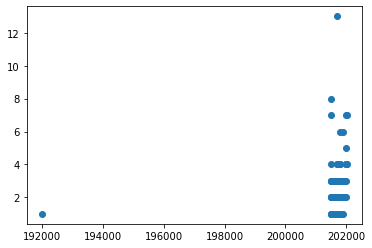

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

#temp3 = pd.Series(np.array(df2['count']), index=df2['MonthYear'])

# gets the index

plt.plot(df2['MonthYear'], df2['count'], 'o')

#plt.bar()

_Below, i am removing that outlier from 1920 and regraphing the results_

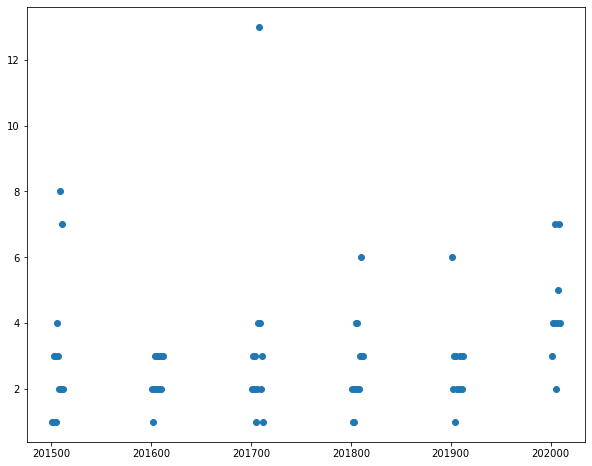

In [75]:
temp4 = df2[:-1][['MonthYear', 'count']].sort_values(by='MonthYear')

plt.figure(figsize=(10,8))
plt.plot(temp4['MonthYear'], temp4['count'], 'o')

_Below, i am graphing a density box plot of the counts. This plot does not tell us anything useful_

<AxesSubplot:xlabel='count'>

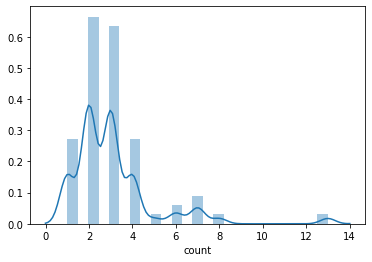

In [73]:
sns.distplot(temp4['count'])

_Next, i attempt to make a time series graph but at the time, was not sure how to make time series in python_

<AxesSubplot:xlabel='MonthYear'>

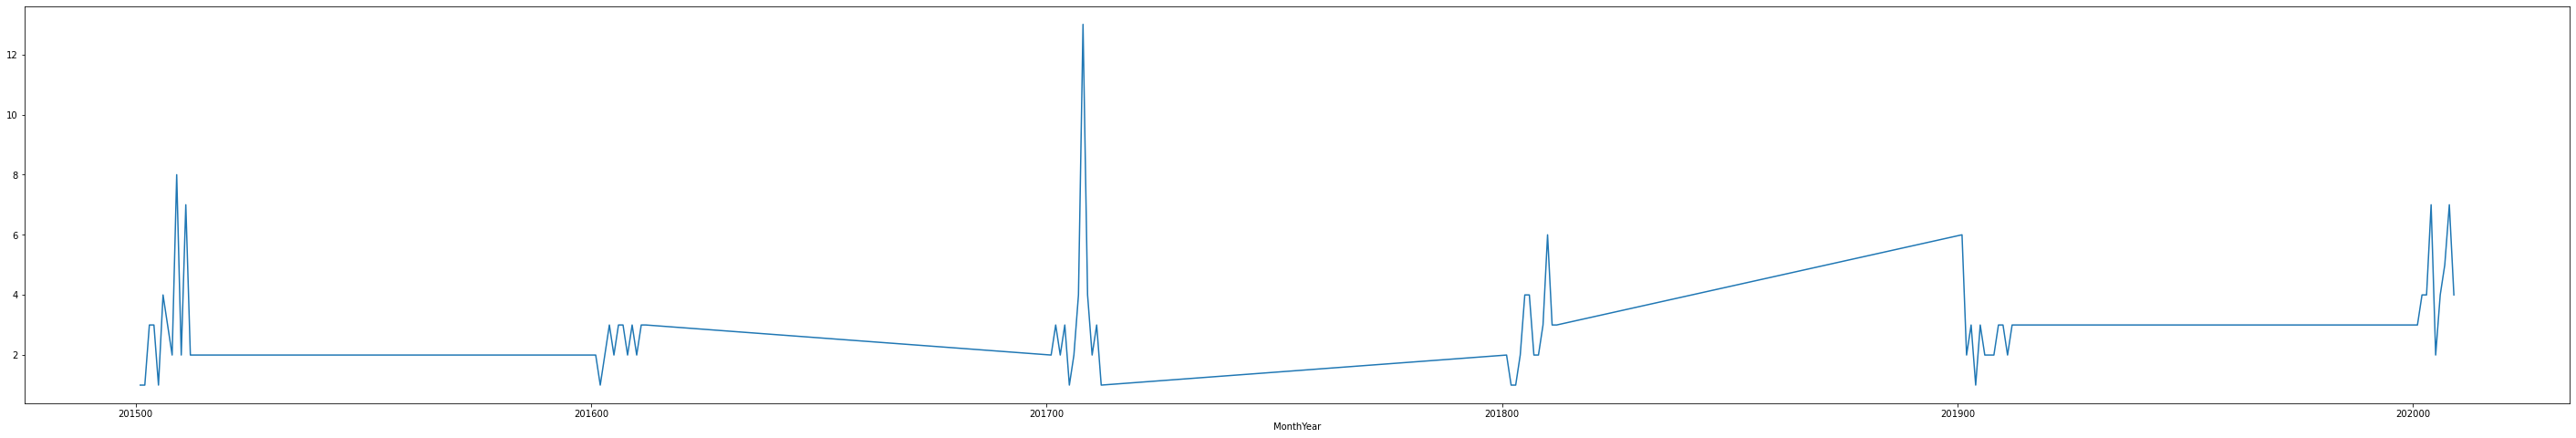

In [84]:
temp4 = df2[:-1][['MonthYear', 'count']].sort_values(by='MonthYear')
temp5 = pd.Series(np.array(temp4['count']), index = temp4['MonthYear'])
temp5

plt.figure(figsize=(50,8))
temp5.plot()
#df.plot.scatter(x = temp4['MonthYear'], y=temp4['count'])

_Next, i try to do a bar plot of the counts from the previous data frame that i created in the cell above. I'm not exactly sure what kind of data frame i created._

<AxesSubplot:ylabel='count'>

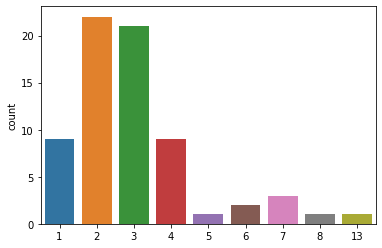

In [86]:
sns.countplot(temp5)

_Below, i make a time series graph of all the times that china was Actor1 and guam was the action location_

Text(0.5, 1.0, 'Number of mentions from China of Guam')

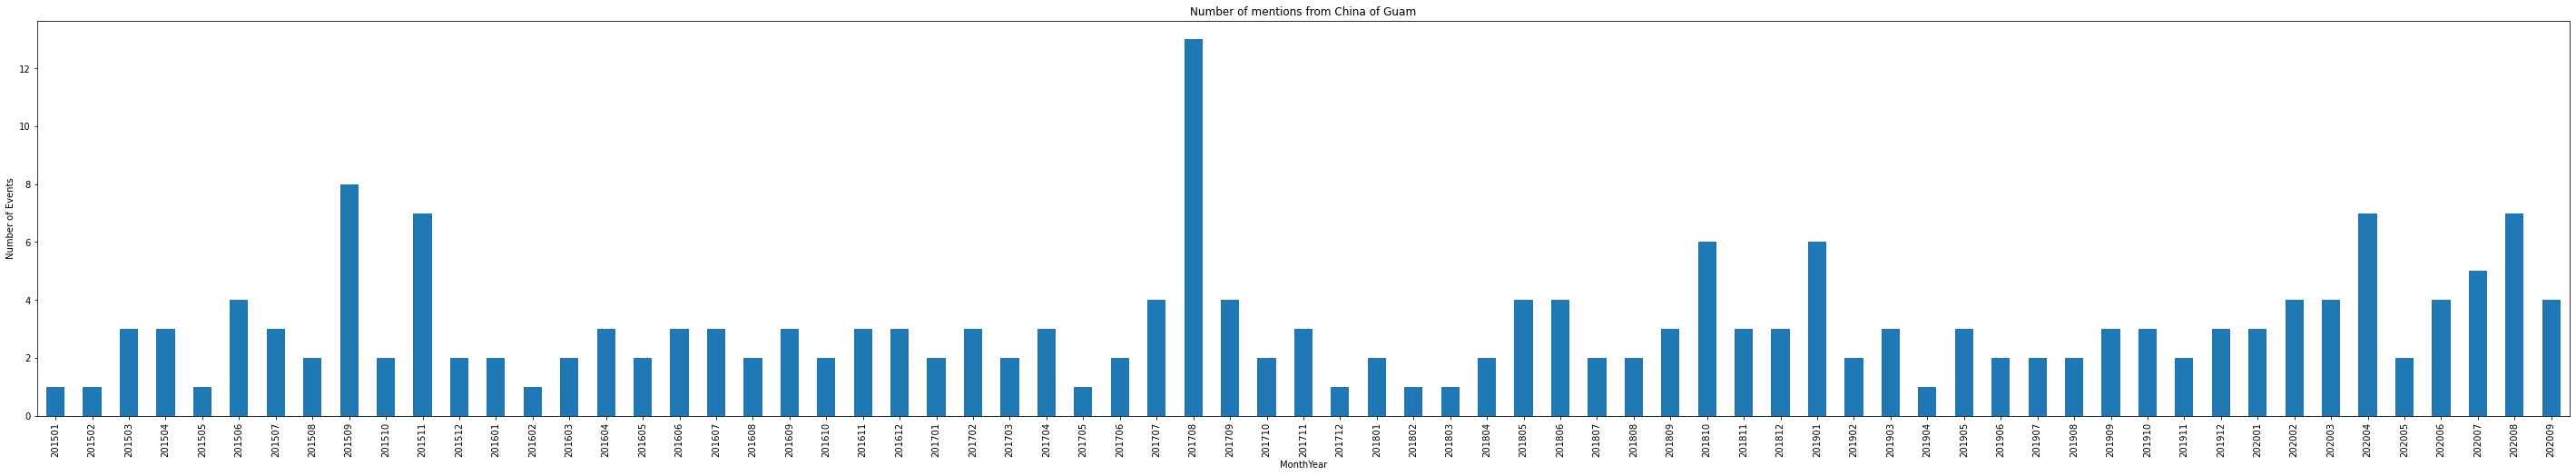

In [95]:
plt.figure(figsize=(50,8))

temp5.plot.bar()
plt.ylabel("Number of Events")
plt.xlabel("MonthYear")
plt.title("Number of mentions from China of Guam")